#House Price Prediction

##Importing all necessary lib

In [184]:
import pandas as pd 
import numpy as np 
import math 
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
import seaborn as sns


##Creating the connection to sql query and reading it from db

In [185]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


       


In [186]:
conn = create_connection("test_database.db")

df = pd.read_sql_query("""SELECT * FROM train""", conn)

In [187]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125


##Getting the info about the data set

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##Replacing the na with median values  

In [189]:
DATA=df
DATA['MSZoning'].fillna("RL", inplace=True)
DATA.LotFrontage.fillna(0, inplace=True)
DATA.Alley.fillna("NO", inplace=True)
DATA.Utilities.fillna('AllPub', inplace=True)
DATA.Exterior1st.fillna("VinylSd", inplace=True)
DATA.Exterior2nd.fillna("VinylSd", inplace=True)
DATA.MasVnrArea.fillna(0., inplace=True)
DATA.BsmtCond.fillna("No", inplace=True)
DATA.BsmtExposure.fillna("NB", inplace=True)
DATA.BsmtFinType1.fillna("NB", inplace=True)
DATA.BsmtFinSF1.fillna(0., inplace=True)
DATA.BsmtFinSF2.fillna(0., inplace=True)
DATA.BsmtUnfSF.fillna(0., inplace=True)
DATA.TotalBsmtSF.fillna(0., inplace=True)
DATA.Electrical.fillna("SBrkr", inplace=True)
DATA.BsmtFullBath.fillna(0., inplace=True)
DATA.BsmtHalfBath.fillna(0., inplace=True)
DATA.KitchenQual.fillna("TA", inplace=True)
DATA.Functional.fillna('Typ', inplace=True)
DATA.FireplaceQu.fillna("No", inplace=True)
DATA.GarageType.fillna("No", inplace=True)
DATA.GarageYrBlt.fillna(0, inplace=True)
DATA.GarageFinish.fillna("No", inplace=True)
DATA.GarageCars.fillna(0, inplace=True)
DATA.GarageArea.fillna(0, inplace=True)
DATA.GarageQual.fillna("No", inplace=True)
DATA.GarageCond.fillna("No", inplace=True)
DATA.PoolQC.fillna("No", inplace=True)
DATA.Fence.fillna("No", inplace=True)
DATA.MiscFeature.fillna("No", inplace=True)
DATA.SaleType.fillna("Con", inplace=True)
DATA.SaleCondition.fillna("Normal", inplace=True)

DATA.BsmtFullBath.replace(3.0, 2.0, inplace=True)
DATA.BsmtFullBath = DATA.BsmtFullBath.astype('int')
DATA.BsmtHalfBath = DATA.BsmtHalfBath.astype('int')
DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([0, 1])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


##LotFrontage NAN filled with median of those in the same neighborhood and street

In [190]:
DATA['LotFrontage'] = DATA.groupby(['Neighborhood', 'Street'])[
    'LotFrontage'].transform(lambda x: x.fillna(x.median()))


##Filtering the some Numerical values 

In [191]:
# DATA.KitchenAbvGr = pd.cut(DATA.KitchenAbvGr, 2)
DATA.KitchenAbvGr = DATA.KitchenAbvGr.astype(
    'category').cat.rename_categories([1, 2])
DATA.TotRmsAbvGrd = DATA.TotRmsAbvGrd.apply(lambda row: 4 if row < 5 else 10)
DATA.Fireplaces = DATA.Fireplaces.apply(lambda row: 2 if row >= 2 else row)
DATA.Fireplaces = DATA.Fireplaces.astype('int')
DATA['GarageAgeCat'] = DATA.GarageYrBlt.apply(
    lambda row: 'recent' if row >= 2000 else 'old')
DATA.GarageCars = DATA.GarageCars.astype('int')


##Converting Categorical data to numerical

In [192]:
marks = {"No": 0, "Po": 1, 'Fa': 2, "TA": 3, 'Gd': 4, 'Ex': 5}


def mark_to_num(mark):
    return marks[mark]


DATA['ExterQual'] = DATA['ExterQual'].apply(mark_to_num)
DATA['ExterCond'] = DATA['ExterCond'].apply(mark_to_num)
DATA['HeatingQC'] = DATA['HeatingQC'].apply(mark_to_num)
DATA['KitchenQual'] = DATA['KitchenQual'].apply(mark_to_num)
DATA['FireplaceQu'] = DATA['FireplaceQu'].apply(mark_to_num)
DATA['GarageQual'] = DATA['GarageQual'].apply(mark_to_num)
DATA['GarageCond'] = DATA['GarageCond'].apply(mark_to_num)
DATA['PoolQC'] = DATA['PoolQC'].apply(mark_to_num)


In [193]:
DATA.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '_1stFlrSF', '_2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

##Converting two to 3 three variable to one to make more sense out of it 

In [194]:
DATA['BsmtFinSF'] = DATA.BsmtFinSF1 + DATA.BsmtFinSF2
DATA['Porch'] = DATA.ScreenPorch + DATA.EnclosedPorch + \
    DATA.OpenPorchSF + DATA.WoodDeckSF
DATA['Total_surface'] = DATA.TotalBsmtSF + DATA['_1stFlrSF'] + DATA['_2ndFlrSF']
DATA['Age'] = DATA.YrSold - DATA.YearBuilt
DATA['RemodAge'] = DATA.YrSold - DATA.YearRemodAdd
DATA['GarageAge'] = DATA.YrSold - DATA.GarageYrBlt


DATA['Overall'] = DATA['OverallCond'] * DATA.OverallQual
DATA['External_Overall'] = DATA['ExterCond'] * DATA['ExterQual']


##Marking Numerical and Categorical data

In [195]:


drop_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea',
             'MiscVal', 'MoSold', 'YrSold', '_1stFlrSF', '_2ndFlrSF', 'BsmtUnfSF', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
numeric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge']
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'Neighborhood',
               'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
               'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
               'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
               'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'LotConfig', 'GarageAgeCat', 'Utilities']
DATA.drop(drop_cols, axis=1, inplace=True)
DATA[categorical] = DATA[categorical].astype('category')
DATA[numeric] = DATA[numeric].astype('float')


In [196]:
numeric1 = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF', 'GrLivArea', 'GarageArea',
           'Porch', 'Total_surface', 'Age', 'RemodAge', 'OverallQual', 'GarageCars', 'GarageAge','SalesPrice']

##Getting the visual representation of all variable with other variable 

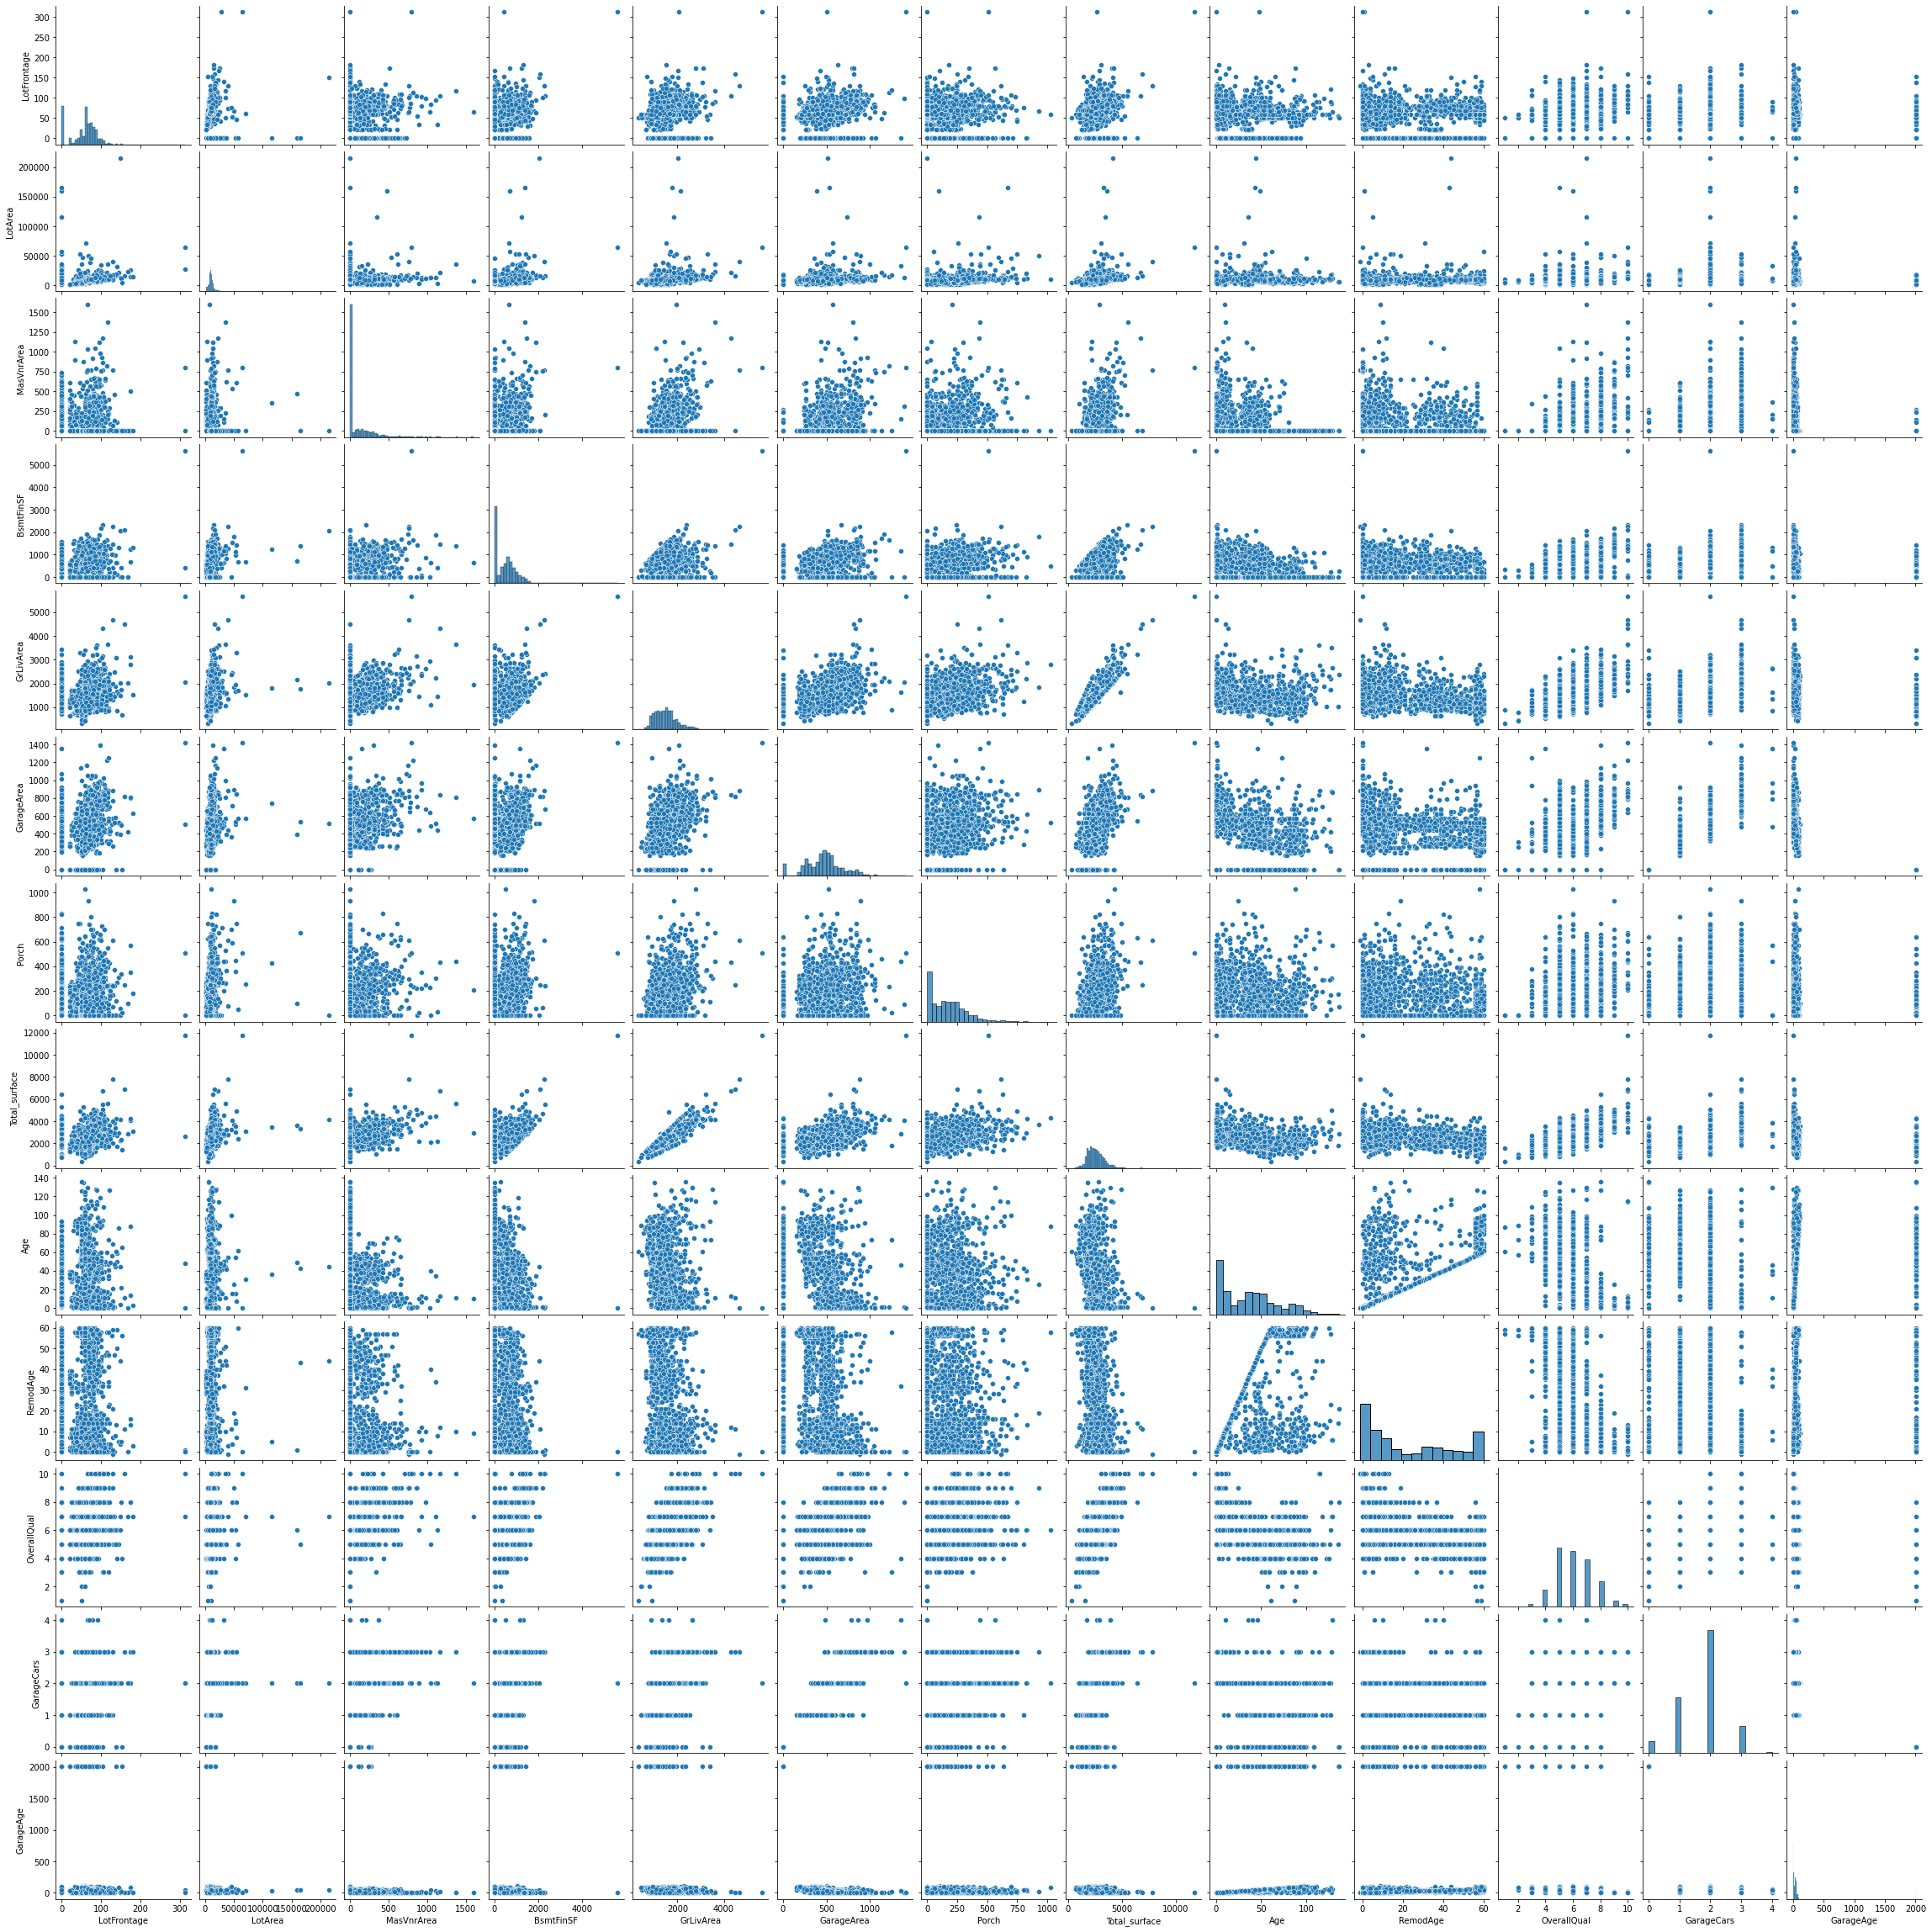

In [197]:
sns.pairplot(DATA[numeric])


##Visualizing the outliers 

<AxesSubplot:>

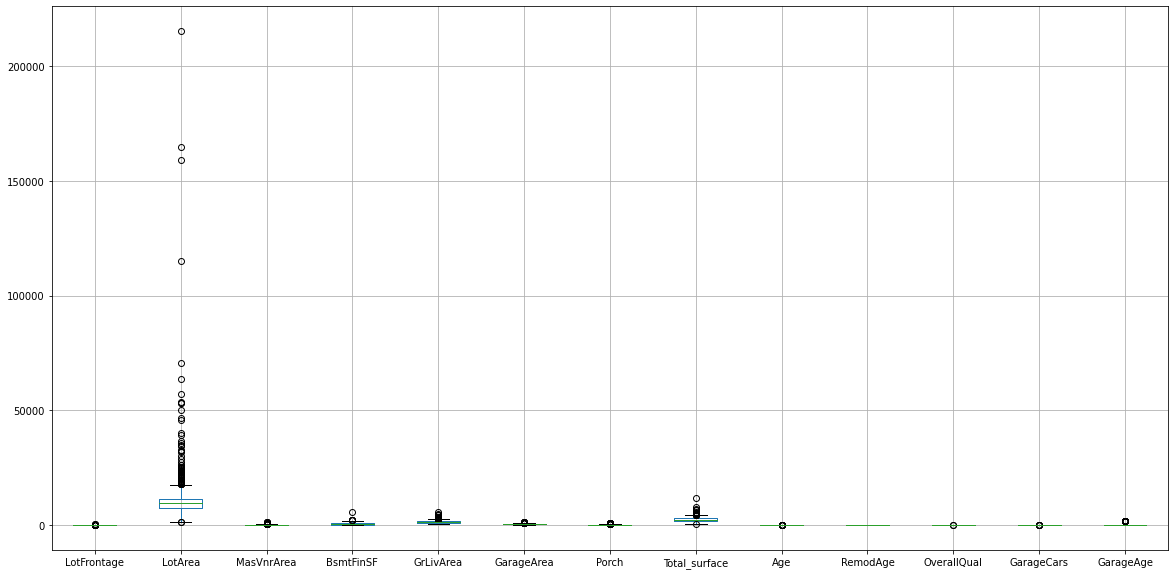

In [198]:
import matplotlib
matplotlib.rc('figure', figsize=(20, 10))

DATA[numeric].boxplot()


In [199]:
DATA[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF      1460 non-null   float64
 4   GrLivArea      1460 non-null   float64
 5   GarageArea     1460 non-null   float64
 6   Porch          1460 non-null   float64
 7   Total_surface  1460 non-null   float64
 8   Age            1460 non-null   float64
 9   RemodAge       1460 non-null   float64
 10  OverallQual    1460 non-null   float64
 11  GarageCars     1460 non-null   float64
 12  GarageAge      1460 non-null   float64
dtypes: float64(13)
memory usage: 148.4 KB


##Removing the first and last 5 percentile of data

0.0 104.0
3311.7000000000003 17401.149999999998
0.0 456.0
0.0 1309.0
848.0 2466.1
0.0 850.0999999999999
0.0 462.1999999999998
1535.95 3973.3999999999996
1.0 91.0
0.0 58.0
4.0 8.0
0.0 3.0
0.0 2006.0


<AxesSubplot:>

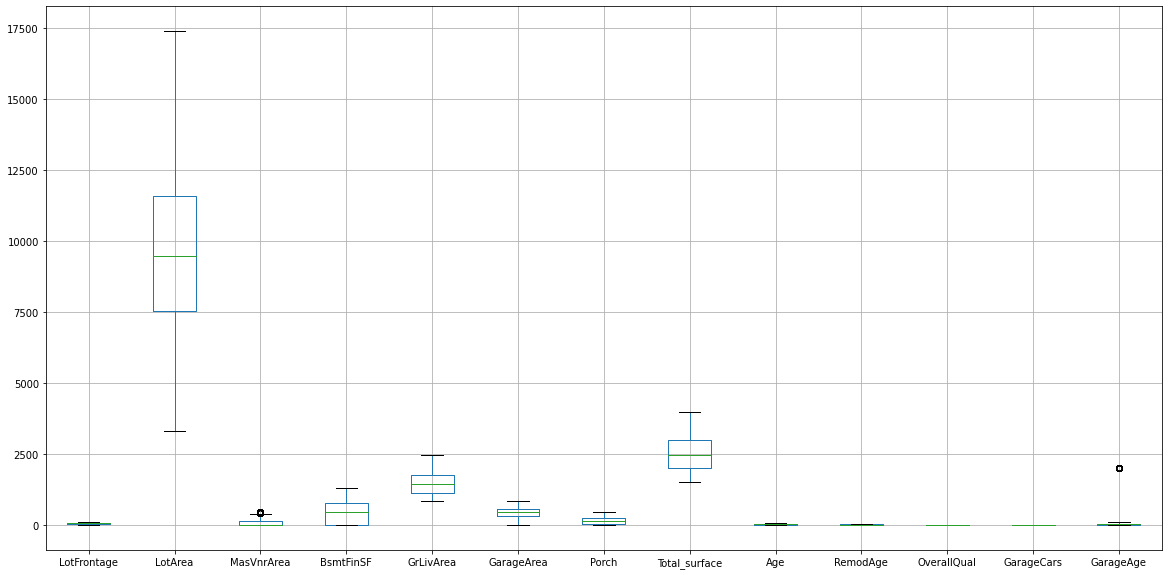

In [200]:

for i in numeric:
    lower = df[i].quantile(.05)
    upper = df[i].quantile(.95)
    print(lower, upper)
    DATA[i] = DATA[i].clip(lower=lower, upper=upper)
    
DATA[numeric].boxplot()


<AxesSubplot:>

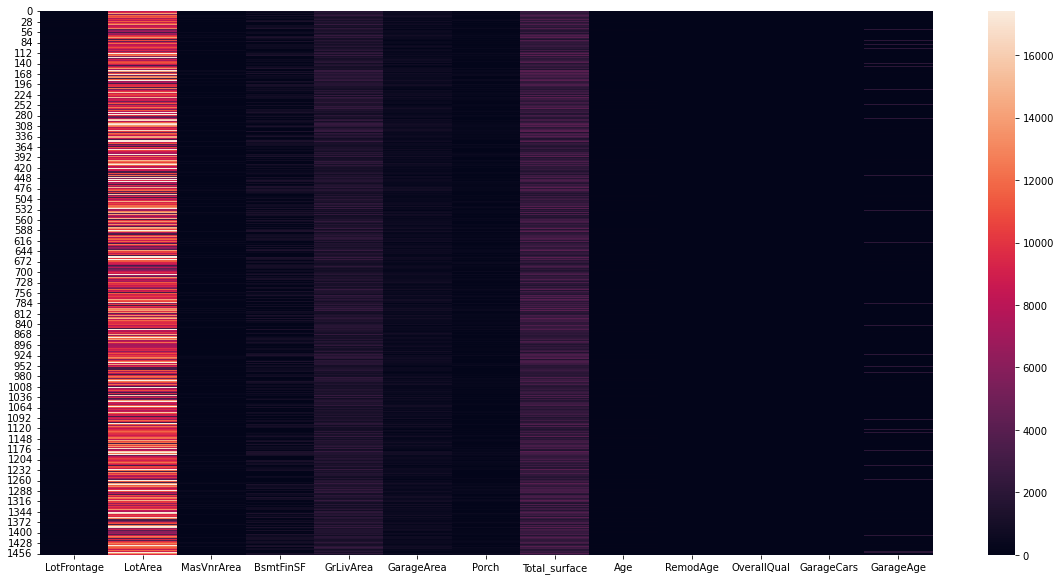

In [201]:
sns.heatmap(DATA[numeric])

In [202]:
len(categorical)


50

In [203]:
DATA.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [204]:
l = numeric

l.append('SalePrice')


##Plotting the correlation plot

<AxesSubplot:>

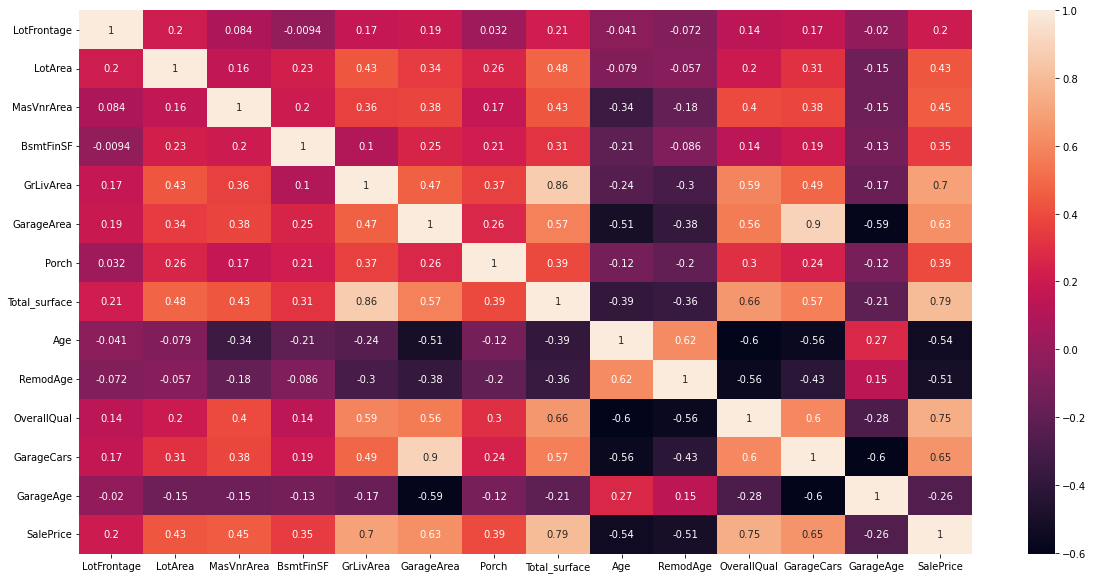

In [205]:


sns.heatmap(DATA[l].corr(),annot=True)


##Plotting the relationship between the variable in hist bar and scatter plot

<AxesSubplot:ylabel='Frequency'>

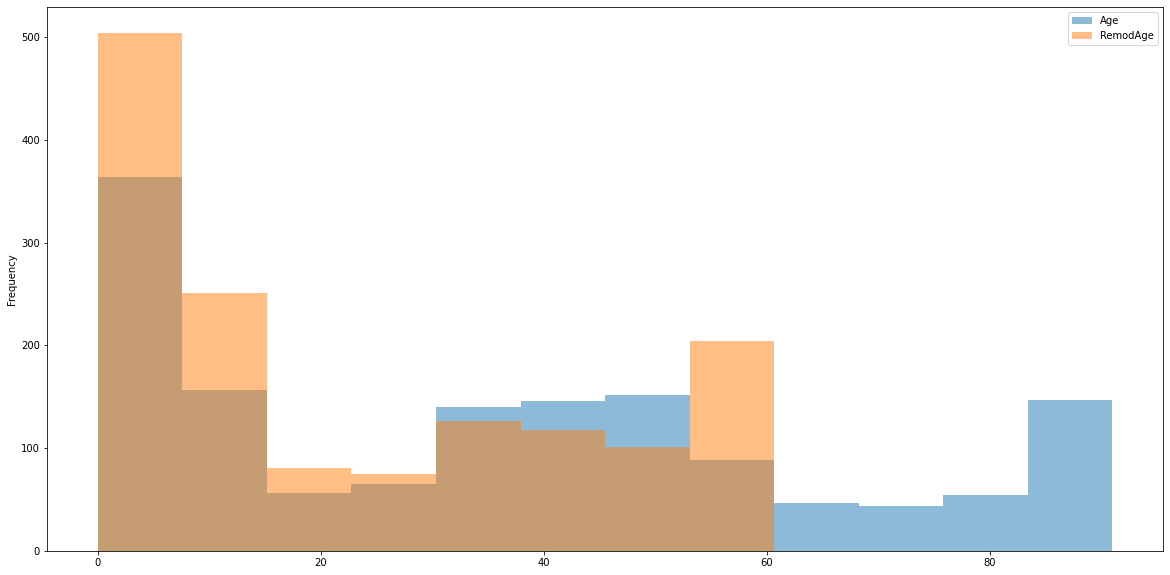

In [206]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


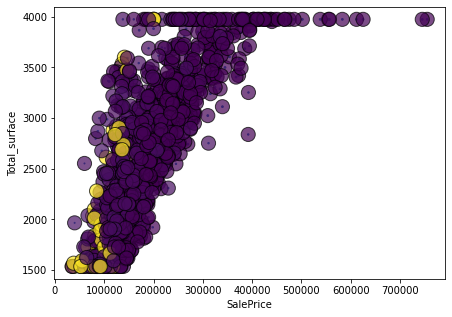

In [207]:
# plt.bar(DATA[['Age','GarageCars']])
DATA.plot.scatter('SalePrice', 'Total_surface', 'GarageCars', marker='o', figsize=(7,5))
plt.scatter(DATA.SalePrice, DATA.Total_surface,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=DATA.GarageAge)

Text(0.5, 0, 'y-Total_surface')

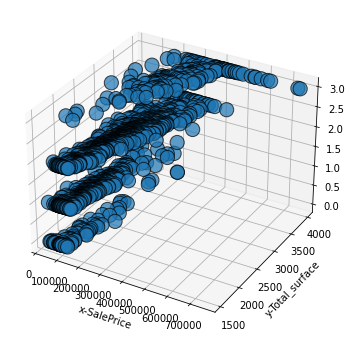

In [208]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(DATA.SalePrice, DATA.Total_surface,DATA.GarageCars,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           )
plt.xlabel("x-SalePrice")
plt.ylabel("y-Total_surface")
# plt.set_zlabel("y-GarageCars")


<AxesSubplot:xlabel='GrLivArea', ylabel='Total_surface'>

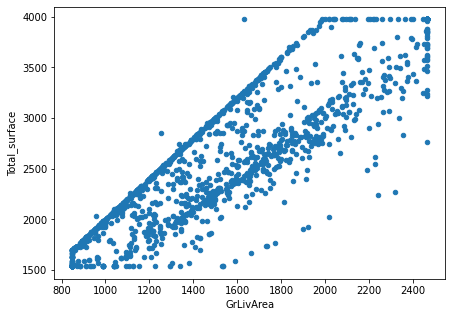

In [209]:
DATA.plot.scatter(x='GrLivArea', y='Total_surface', marker='o', figsize=(7,5))


<AxesSubplot:ylabel='Frequency'>

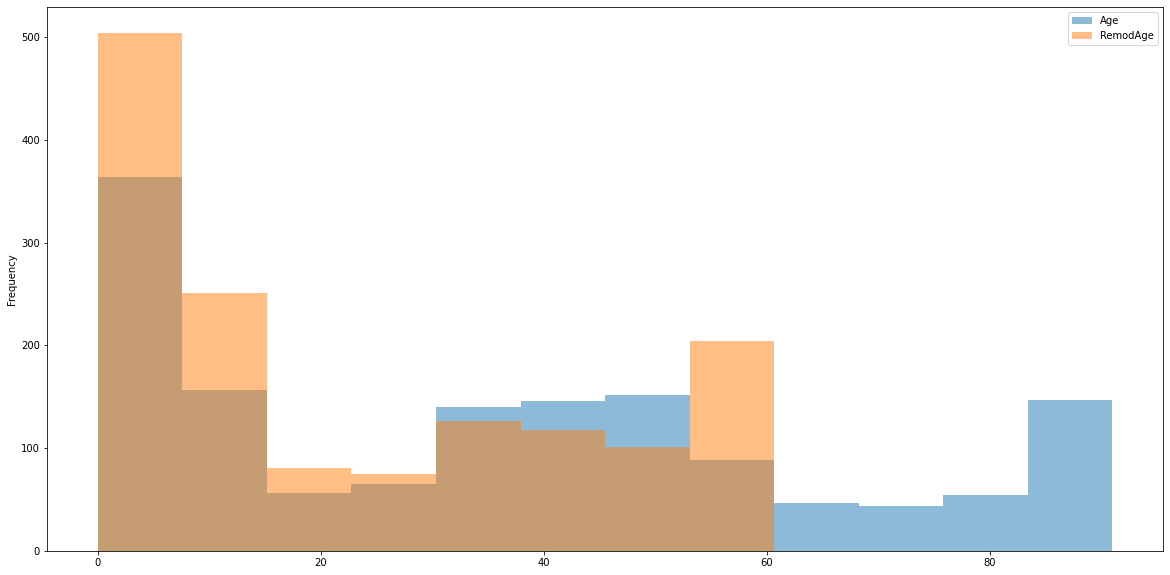

In [210]:
DATA[['Age','RemodAge']].plot.hist(bins=12, alpha=0.5)


##converting the remaining categorical data to numeric values

In [211]:


DATA = pd.get_dummies(DATA, columns=categorical)


In [212]:
DATA

,Id,LotFrontage,LotArea,Condition1,Condition2,OverallQual,Exterior1st,Exterior2nd,MasVnrArea,GrLivArea,...,SaleCondition_Partial,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,GarageAgeCat_old,GarageAgeCat_recent,Utilities_AllPub,Utilities_NoSeWa
0,1,65.0,8450.0,Norm,Norm,7.0,VinylSd,VinylSd,196.0,1710.0,...,0,0,0,0,0,1,0,1,1,0
1,2,80.0,9600.0,Feedr,Norm,6.0,MetalSd,MetalSd,0.0,1262.0,...,0,0,0,1,0,0,1,0,1,0
2,3,68.0,11250.0,Norm,Norm,7.0,VinylSd,VinylSd,162.0,1786.0,...,0,0,0,0,0,1,0,1,1,0
3,4,60.0,9550.0,Norm,Norm,7.0,Wd Sdng,Wd Shng,0.0,1717.0,...,0,1,0,0,0,0,1,0,1,0
4,5,84.0,14260.0,Norm,Norm,8.0,VinylSd,VinylSd,350.0,2198.0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,Norm,Norm,6.0,VinylSd,VinylSd,0.0,1647.0,...,0,0,0,0,0,1,1,0,1,0
1456,1457,85.0,13175.0,Norm,Norm,6.0,Plywood,Plywood,119.0,2073.0,...,0,0,0,0,0,1,1,0,1,0
1457,1458,66.0,9042.0,Norm,Norm,7.0,CemntBd,CmentBd,0.0,2340.0,...,0,0,0,0,0,1,1,0,1,0
1458,1459,68.0,9717.0,Norm,Norm,5.0,MetalSd,MetalSd,0.0,1078.0,...,0,0,0,0,0,1,1,0,1,0


In [213]:
DATA.dtypes

Id                       int64
LotFrontage            float64
LotArea                float64
Condition1              object
Condition2              object
                        ...   
LotConfig_Inside         uint8
GarageAgeCat_old         uint8
GarageAgeCat_recent      uint8
Utilities_AllPub         uint8
Utilities_NoSeWa         uint8
Length: 292, dtype: object

##Dropping parameters that is not significant 

In [214]:
DATA=DATA.drop(['Exterior1st'],axis=1)
DATA=DATA.drop(['Condition1','Condition2'],axis=1)
DATA=DATA.drop(['Exterior2nd'],axis=1)


##Random forest regression 

In [215]:
x=DATA
x=x.drop('SalePrice',axis=1)
x
y=DATA['SalePrice']

# Break off validation set from training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Get validation predictions and MAE

preds_valid = model.predict(X_valid)
print("RMSE (random forest approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (random forest approach):
1085932325.9559262


##Decision Trees

In [216]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(X_valid)
print("RMSE (Descion tree approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (Descion tree approach):
2050367545.828767


##Linear Regression

In [217]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(X_valid)
print("RMSE (linear regression approach):")
print(mean_squared_error(y_valid, preds_valid))

RMSE (linear regression approach):
1569010540.8687844


##Finding the best nearest neighbor for knn and implementing it 

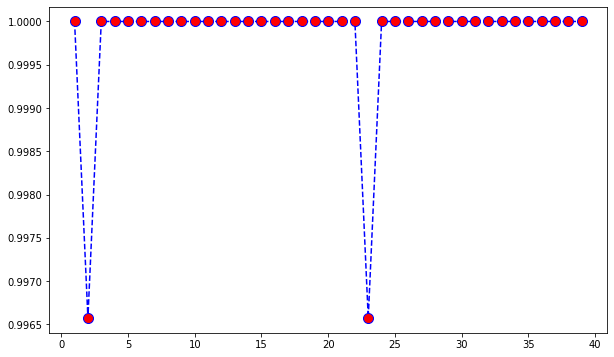

In [218]:
error_rate = []
# Will take some time
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,40):
 
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_valid)
 error_rate.append(np.mean(pred_i != y_valid))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
# plt.title(‘Error Rate vs. K Value’)
# plt.xlabel(‘K’)
# plt.ylabel(‘Error Rate’)

In [219]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_valid)
print(mean_squared_error(y_valid, pred_i))

3456739337.182363
